# Total Cloud Cover over the GoM

In [9]:
import xarray as xr 
import json
import gcsfs
import matplotlib.pyplot as plt
import numpy as np

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

#ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/tcc_22-24.zarr'))
ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/tcc_10-23.zarr'))

In [2]:
ds

<xarray.Dataset> Size: 100MB
Dimensions:    (latitude: 41, longitude: 113, time: 5397)
Coordinates:
  * latitude   (latitude) float64 328B 31.0 30.75 30.5 30.25 ... 21.5 21.25 21.0
  * longitude  (longitude) float64 904B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 43kB 2010-01-01 2010-01-02 ... 2024-10-10
Data variables:
    tcc        (time, latitude, longitude) float32 100MB dask.array<chunksize=(675, 11, 29), meta=np.ndarray>

In [3]:
tcc = ds.tcc

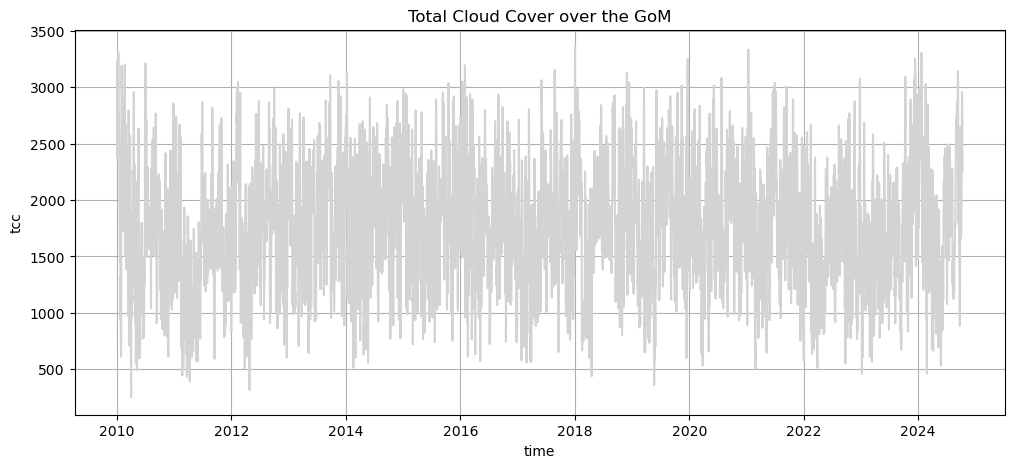

In [5]:
tcc.sum(['latitude', 'longitude']).plot(figsize=(12,5), color='lightgrey')
plt.grid()
plt.title('Total Cloud Cover over the GoM');

In [7]:
clim = tcc.groupby('time.day').mean('time')
anom = tcc.groupby('time.day') - clim

Text(0.5, 1.0, 'Anomalous Cloud Cover over the GoM')

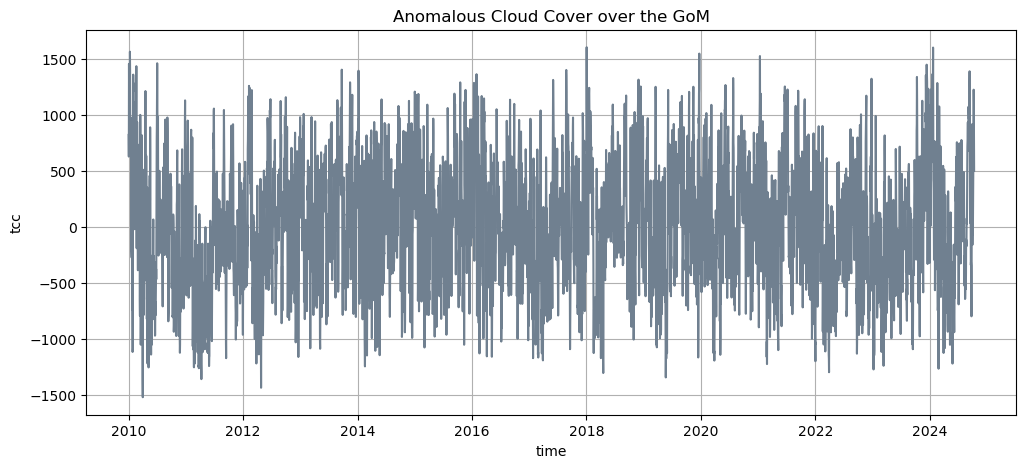

In [8]:
anom.sum(['latitude', 'longitude']).plot(figsize=(12,5), color='slategrey')
plt.grid()
plt.title('Anomalous Cloud Cover over the GoM')

In [13]:
anom.sum(['latitude', 'longitude'])

<xarray.DataArray 'tcc' (time: 5397)> Size: 22kB
dask.array<sum-aggregate, shape=(5397,), dtype=float32, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 43kB 2010-01-01 2010-01-02 ... 2024-10-10
    day      (time) int64 43kB 1 2 3 4 5 6 7 8 9 10 11 ... 1 2 3 4 5 6 7 8 9 10

In [18]:
anom.sum(['latitude', 'longitude']).polyfit(dim='time', deg=3)

<xarray.Dataset> Size: 64B
Dimensions:               (degree: 4)
Coordinates:
  * degree                (degree) int64 32B 3 2 1 0
Data variables:
    polyfit_coefficients  (degree) float64 32B dask.array<chunksize=(4,), meta=np.ndarray>

In [19]:
f = np.poly1d(anom.sum(['latitude', 'longitude']).polyfit(dim='time', deg=3)['polyfit_coefficients'])

In [20]:
f

poly1d([ 9.59851898e-51, -4.57623677e-32,  7.22819189e-14, -3.78045407e+04])

In [25]:
anom.time[0].dtype

dtype('<M8[ns]')

In [21]:
# calculate new x's and y's
x_new = np.linspace(anom.time[0], anom.time[-1], 50)
y_new = f(x_new)

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.DateTime64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes._PyFloatDType'>)

In [14]:
z = np.polyfit(anom.sum(['latitude', 'longitude']).time, 
           anom.sum(['latitude', 'longitude']).values, 3)
f = np.poly1d(z)

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

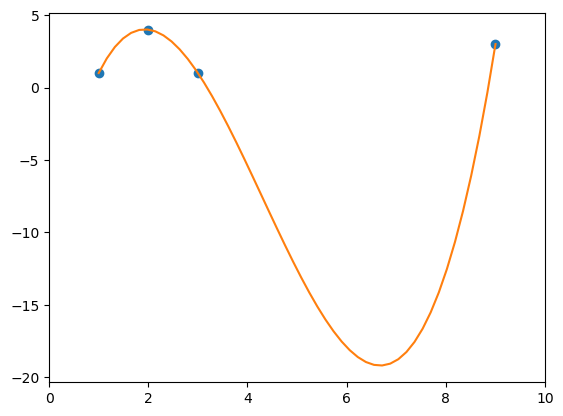

In [10]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

## Load in SST for 2023 for movie

In [27]:
ds_sst = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/sw_sst23.zarr'))
ds_sst

<xarray.Dataset> Size: 507MB
Dimensions:    (latitude: 37, longitude: 113, time: 7578)
Coordinates:
  * latitude   (latitude) float32 148B 22.0 22.25 22.5 22.75 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 61kB 2023-01-01 ... 2023-11-12T17:00:00
Data variables:
    ssr        (time, latitude, longitude) float64 253MB dask.array<chunksize=(7578, 37, 113), meta=np.ndarray>
    sst        (time, latitude, longitude) float64 253MB dask.array<chunksize=(7578, 37, 113), meta=np.ndarray>
Attributes:
    long_name:      Surface net short-wave (solar) radiation
    standard_name:  surface_net_downward_shortwave_flux
    units:          J m**-2

In [30]:
ds_sst = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/gom_updated.zarr'))
ds_sst

<xarray.Dataset> Size: 2GB
Dimensions:    (latitude: 41, longitude: 113, time: 8760)
Coordinates:
  * latitude   (latitude) float32 164B 31.0 30.75 30.5 30.25 ... 21.5 21.25 21.0
  * longitude  (longitude) float32 452B -100.0 -99.75 -99.5 ... -72.25 -72.0
  * time       (time) datetime64[ns] 70kB 2023-01-01 ... 2023-12-31T23:00:00
Data variables:
    slhf       (time, latitude, longitude) float64 325MB dask.array<chunksize=(8760, 41, 113), meta=np.ndarray>
    sshf       (time, latitude, longitude) float64 325MB dask.array<chunksize=(8760, 41, 113), meta=np.ndarray>
    ssr        (time, latitude, longitude) float64 325MB dask.array<chunksize=(8760, 41, 113), meta=np.ndarray>
    sst        (time, latitude, longitude) float64 325MB dask.array<chunksize=(8760, 41, 113), meta=np.ndarray>
    str        (time, latitude, longitude) float64 325MB dask.array<chunksize=(8760, 41, 113), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-29 19:17:30 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [40]:
anom.sel(time=slice('2023-01-01', '2023-12-31')).time

<xarray.DataArray 'time' (time: 365)> Size: 3kB
array(['2023-01-01T00:00:00.000000000', '2023-01-02T00:00:00.000000000',
       '2023-01-03T00:00:00.000000000', ..., '2023-12-29T00:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
    day      (time) int64 3kB 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30 31
Attributes:
    long_name:      time
    standard_name:  time

In [80]:
sst = ds_sst.sst.resample(time='D').mean('time') - 273.15

In [81]:
sst.time

<xarray.DataArray 'time' (time: 365)> Size: 3kB
array(['2023-01-01T00:00:00.000000000', '2023-01-02T00:00:00.000000000',
       '2023-01-03T00:00:00.000000000', ..., '2023-12-29T00:00:00.000000000',
       '2023-12-30T00:00:00.000000000', '2023-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2023-01-01 2023-01-02 ... 2023-12-31
Attributes:
    long_name:  time

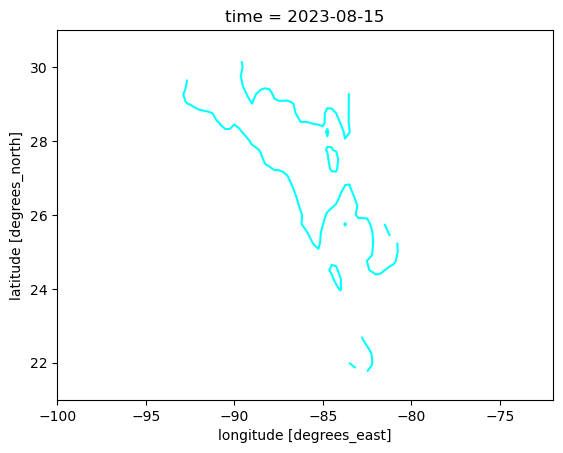

In [82]:
theta_levs = np.arange(20,34,0.2)
sst.isel(time=226).plot.contour(colors='cyan', levels=[theta_levs[59]])

## Movie of Total Cloud Cover overlaid with WWM 31.8˚C isotherm

In [86]:
pip install xmovie

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


  Using cached xmovie-0.3.1-py3-none-any.whl.metadata (867 bytes)
Using cached xmovie-0.3.1-py3-none-any.whl (16 kB)
Note: you may need to restart the kernel to use updated packages.


In [87]:
from xmovie import Movie
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [96]:
anom.sel(time=slice('2023-01-01', '2023-12-31')).shape

(365, 41, 113)

In [97]:
sst.shape

(365, 41, 113)

In [106]:
import cmocean

def contour_surf(da, fig, tt, *args, **kwargs):
    
    ax = fig.subplots()
    theta_levs = np.arange(20,34,0.2)

    C = sst.isel(time=tt).plot.contour(colors='k', levels=[theta_levs[59]], ax=ax)
    #ax.clabel(C)
    
    Cf = da.isel(time=tt).plot(cmap='RdBu_r', vmin=-0.5, vmax=0.5, 
                               ax=ax, add_colorbar=True)
    
    return ax, Cf

(<Axes: title={'center': 'time = 2023-08-15, day = 15'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>,
 <matplotlib.collections.QuadMesh at 0x798864efa480>)

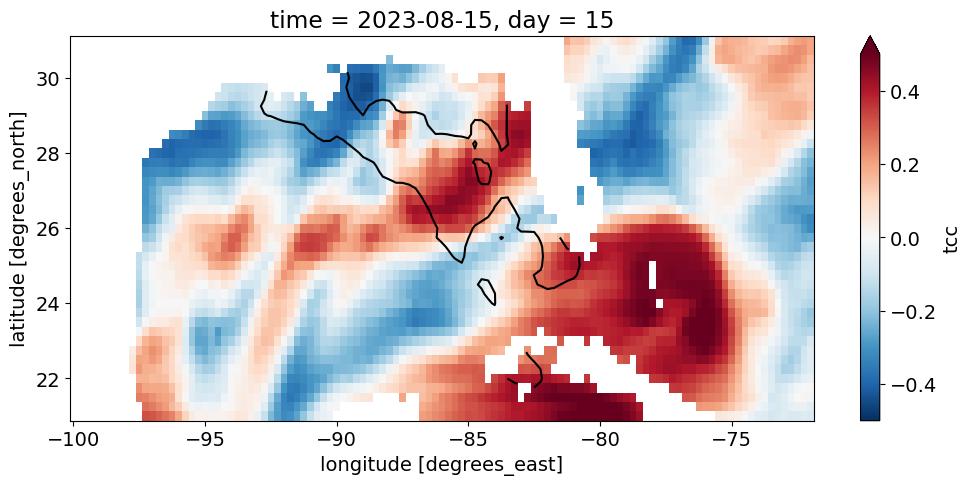

In [107]:
fig = plt.figure(figsize=(12, 5))

contour_surf(anom.sel(time=slice('2023-01-01', '2023-12-31')), fig, 226)

In [108]:
tcc_anom_obj = Movie(anom.sel(time=slice('2023-01-01', '2023-12-31')), contour_surf, input_check=False)

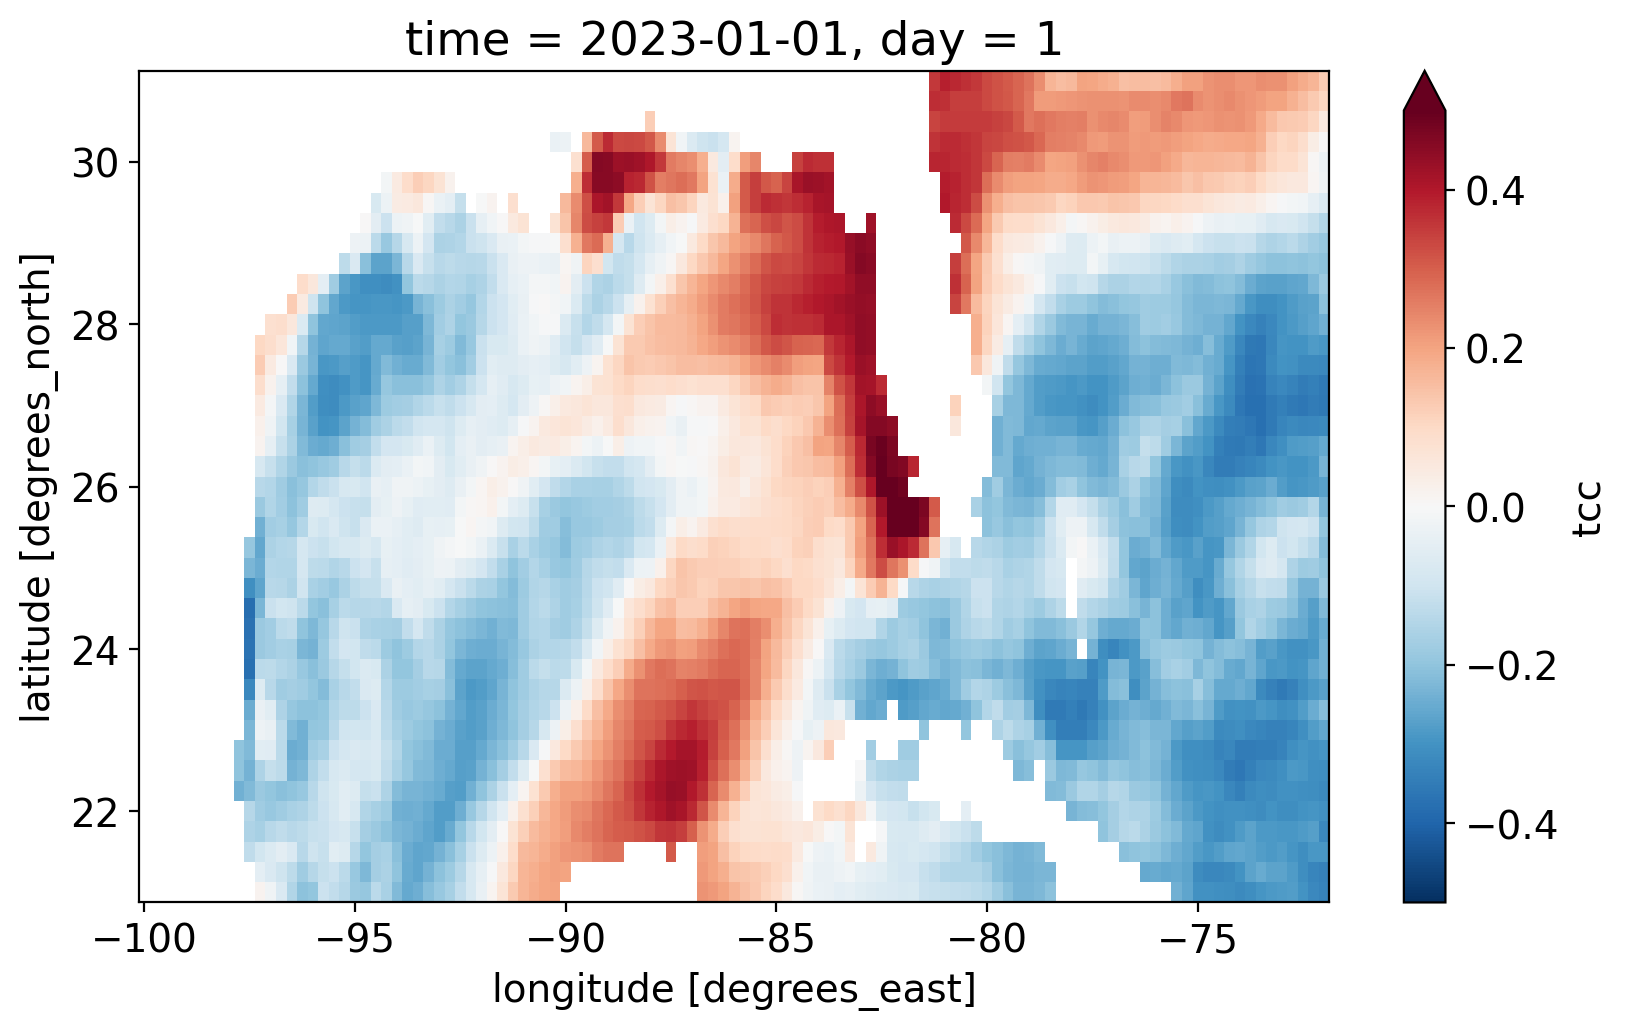

In [109]:
tcc_anom_obj.preview(0)

In [110]:
#save tcc movie
tcc_anom_obj.save('tcc_anom_sst_contour_era.mp4', progress=True, overwrite_existing=True)

  0%|          | 0/365 [00:00<?, ?it/s]

Movie created at tcc_anom_sst_contour_era.mp4
